# Understanding CNNs better

1. Number of parameters per filter/neuron
2. Calculating Output size

## Create data

In [21]:
import numpy as np

#### input image
3D image of shape (3, 5, 5)

In [22]:
X = [
    [ 
     [2, 1, 0, 0, 2], 
     [1, 1, 0, 1, 1], 
     [1, 2, 2, 1, 0], 
     [0, 0, 2, 0, 0], 
     [1, 0, 1, 0, 1]], 
    [
     [2, 2, 1, 2, 1], 
     [1, 2, 1, 0, 2], 
     [0, 1, 1, 0, 2], 
     [0, 2, 1, 2, 2], 
     [0, 1, 0, 1, 2]], 
    [
     [0, 2, 0, 2, 1], 
     [0, 2, 2, 1, 1], 
     [1, 0, 1, 2, 0], 
     [1, 0, 1, 2, 0], 
     [0, 0, 0, 0, 0]]
]

In [23]:
X = np.array([X])
X.shape

(1, 3, 5, 5)

### Understanding filter shapes

#### Applying filters of size (3 * 3)
Each filter connects to (3 x 3) section of the image across the 3 channels therefore -> filter shape (3 x 3 x 3)

## Number of parameters per filter

A filter of size = 3, applied to an input having 3 channels would have:
<br/>
3 x 3 x 3 = 27 parameters + 1 bias

### Create filters

In [43]:
# filter 1
W0 = [
    [[1, 0, -1], 
     [1, 1, -1], 
     [0, 0, -1]], 
    [[0, 0, 1], 
     [1, 1, 0], 
     [0, 0, 0]], 
    [[-1, 1, 0], 
     [0, 0, 0], 
     [0, -1, 0]]
]
W0 = np.array(W0)
W0.shape

(3, 3, 3)

In [44]:
# filter 2
W1 = [
    [[-1, 0, -1], 
     [1, 0, 0], 
     [1, 0, 1]], 
    [[-1, 1, 0], 
     [1, 1, 0], 
     [-1, 0, 1]], 
    [[-1, 1, 1], 
     [-1, -1, 0], 
     [0, 1, 1]]
]
W1 = np.array(W1)
W1.shape

(3, 3, 3)

In [45]:
W = [list(W0), list(W1)]
W = np.array(W)
W.shape

(2, 3, 3, 3)

These are the two filters that will be applied to X

## Hyper parameters

In [27]:
S = 2 # stride
P = 1 # zero padding
W_size = 5 # input size
K = 2 # number of filters
F_size = 3 # filter size

In [28]:
# Bias
B1 = 1
B2 = 0

CNN Layout based on hyper parameters

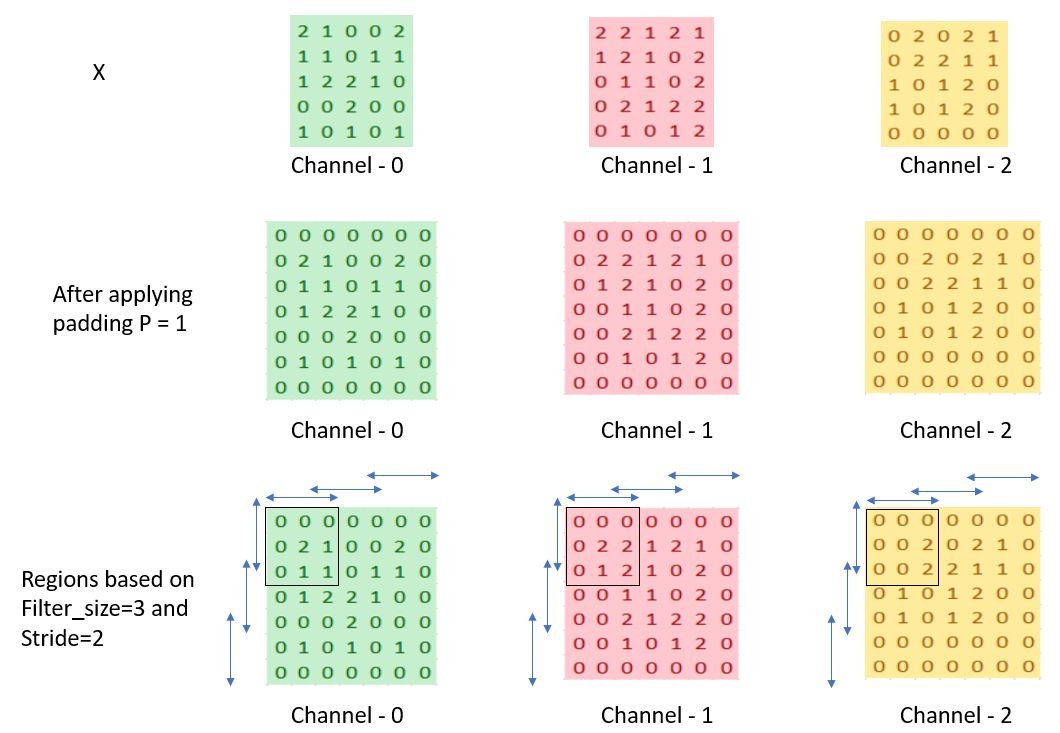

In [3]:
from IPython.display import Image
Image(filename='../images/CNN_full.png')

Clearly:
    > To traverse X horizontally, filter is applied 3 times
    > To traverse X vertically, filter is applied 3 times
    
    Each time filter is applied to a region of X (across all channels), it produces 1 output value. Thus total (3 x 3) output values are created after traversing full X.
    
    > The same process is repeated for all filters. Thus, for two filters output shape = (2 x 3 x 3)

## Calculate output shape (formula)

output size (O) = (W-F+2P)/S + 1

In [42]:
# get filters shape
n_filters, d_filter, h_filter, w_filter = W.shape

# get input shape
n_x, d_x, h_x, w_x = X.shape

# calculate the output shapes
h_out = (h_x - h_filter + 2 * P) / S + 1
w_out = (w_x - w_filter + 2 * P) / S + 1
h_out, w_out = int(h_out), int(w_out)

# output height, width
h_out, w_out

(3, 3)

By applying 2 filters -> output shape will be (2 x 3 x 3)

## Applying convolution to a region of X

Applying filter W1 to region of X:

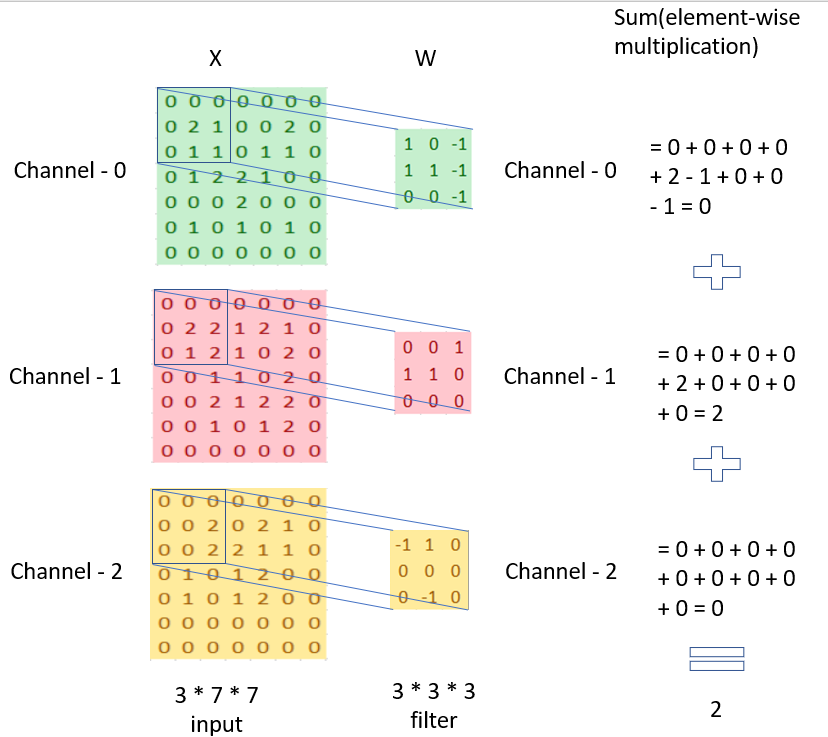

In [1]:
from IPython.display import Image
Image(filename='../images/CNN_1.png')

Using above approach, a loop maybe required to apply the filter W1 to entire X. It can be easily avoided by flattening region of X and the filter W1, and then using matrix multiplication to get the final output.

Reshaped form of the above  operation:


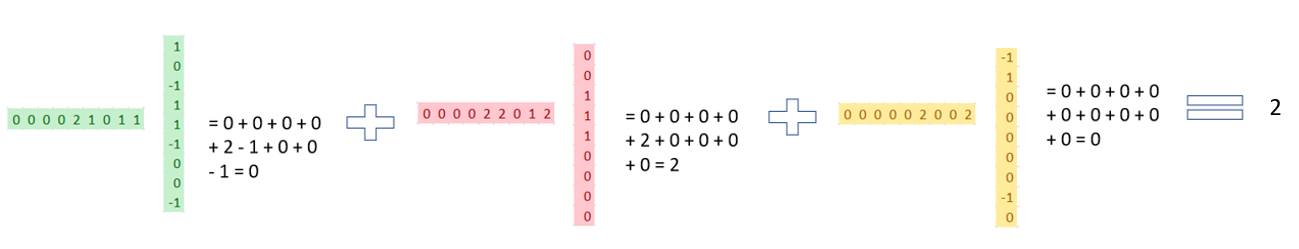

In [2]:
from IPython.display import Image
Image(filename='../images/CNN_2.png')

select the top 3 x 3 section of X (including all 3 channels) 

In [30]:
X_padded = np.pad(X, ((0, 0), (0, 0), (P, P), (P, P)), mode='constant')
X_padded

array([[[[0, 0, 0, 0, 0, 0, 0],
         [0, 2, 1, 0, 0, 2, 0],
         [0, 1, 1, 0, 1, 1, 0],
         [0, 1, 2, 2, 1, 0, 0],
         [0, 0, 0, 2, 0, 0, 0],
         [0, 1, 0, 1, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0],
         [0, 2, 2, 1, 2, 1, 0],
         [0, 1, 2, 1, 0, 2, 0],
         [0, 0, 1, 1, 0, 2, 0],
         [0, 0, 2, 1, 2, 2, 0],
         [0, 0, 1, 0, 1, 2, 0],
         [0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 2, 0, 2, 1, 0],
         [0, 0, 2, 2, 1, 1, 0],
         [0, 1, 0, 1, 2, 0, 0],
         [0, 1, 0, 1, 2, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0]]]])

In [31]:
X_crop = X_padded[0][:, :3, :3]
X_crop, X_crop.shape

(array([[[0, 0, 0],
         [0, 2, 1],
         [0, 1, 1]],
 
        [[0, 0, 0],
         [0, 2, 2],
         [0, 1, 2]],
 
        [[0, 0, 0],
         [0, 0, 2],
         [0, 0, 2]]]), (3, 3, 3))

In [32]:
W0[0]

array([[ 1,  0, -1],
       [ 1,  1, -1],
       [ 0,  0, -1]])

In [33]:
W0[0].ravel()

array([ 1,  0, -1,  1,  1, -1,  0,  0, -1])

In [34]:
# select channels 0 of X crop and apply the first filter W0
X_crop[0].ravel().dot(W0[0].ravel())

0

## Applying Convolution to entire X

In [35]:
def get_im2col_indices(x_shape, field_height, field_width, padding=1, stride=1):
  # First figure out what the size of the output should be
  N, C, H, W = x_shape
  assert (H + 2 * padding - field_height) % stride == 0
  assert (W + 2 * padding - field_height) % stride == 0
  out_height = (H + 2 * padding - field_height) / stride + 1
  out_width = (W + 2 * padding - field_width) / stride + 1
  
  out_height, out_width = int(out_height), int(out_width)
  i0 = np.repeat(np.arange(field_height), field_width)
  i0 = np.tile(i0, C)
  i1 = stride * np.repeat(np.arange(out_height), out_width)
  j0 = np.tile(np.arange(field_width), field_height * C)
  
  j1 = stride * np.tile(np.arange(out_width), out_height)
  i = i0.reshape(-1, 1) + i1.reshape(1, -1)
  j = j0.reshape(-1, 1) + j1.reshape(1, -1)

  k = np.repeat(np.arange(C), field_height * field_width).reshape(-1, 1)

  return (k, i, j)

def im2col_indices(x, field_height, field_width, padding=1, stride=1):
  """ An implementation of im2col based on some fancy indexing """
  # Zero-pad the input
  p = padding
  x_padded = np.pad(x, ((0, 0), (0, 0), (p, p), (p, p)), mode='constant')

  k, i, j = get_im2col_indices(x.shape, field_height, field_width, padding,
                               stride)

  cols = x_padded[:, k, i, j]
  C = x.shape[1]
  cols = cols.transpose(1, 2, 0).reshape(field_height * field_width * C, -1)
  return cols

Reshape X and W to apply convolution without using loops

In [36]:
X_col = im2col_indices(X, 3, 3, P, S)
X_col.shape

(27, 9)

In [37]:
X_col

array([[0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 2, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 2, 1, 0, 0, 0],
       [2, 0, 2, 1, 2, 0, 1, 1, 1],
       [1, 0, 0, 2, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 2, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 2, 2],
       [0, 0, 0, 1, 1, 2, 0, 1, 2],
       [0, 0, 0, 2, 0, 0, 2, 2, 0],
       [0, 2, 2, 0, 1, 0, 0, 1, 1],
       [2, 1, 1, 0, 1, 2, 0, 0, 2],
       [2, 2, 0, 1, 0, 0, 1, 1, 0],
       [0, 2, 0, 0, 2, 2, 0, 0, 0],
       [1, 1, 2, 0, 1, 2, 0, 0, 0],
       [2, 0, 0, 2, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 1, 0, 0, 2],
       [0, 0, 0, 0, 2, 1, 1, 1, 0],
       [0, 0, 0, 2, 1, 0, 0, 2, 0],
       [0, 2, 2, 0, 0, 2, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0],
       [2, 2, 0, 0, 2, 0, 0, 0, 0],
       [0, 2, 1, 0, 0, 2, 0, 0, 0],
       [0, 2, 1, 1, 1, 0, 0, 0, 0],
       [2, 1, 0, 0, 2, 0, 0, 0, 0]])

In [38]:
W_col = W.reshape(K, -1)
W_col, W_col.shape

(array([[ 1,  0, -1,  1,  1, -1,  0,  0, -1,  0,  0,  1,  1,  1,  0,  0,  0,
          0, -1,  1,  0,  0,  0,  0,  0, -1,  0],
        [-1,  0, -1,  1,  0,  0,  1,  0,  1, -1,  1,  0,  1,  1,  0, -1,  0,
          1, -1,  1,  1, -1, -1,  0,  0,  1,  1]]), (2, 27))

### Convolution output

In [39]:
out = W_col @ X_col
out

array([[ 2,  1,  4, -1,  4,  4,  4,  5,  2],
       [ 7,  5,  2,  4,  4,  0,  1,  3,  1]])

In [40]:
out = W_col @ X_col
out = out.reshape(n_x, n_filters, h_out, w_out)
out

array([[[[ 2,  1,  4],
         [-1,  4,  4],
         [ 4,  5,  2]],

        [[ 7,  5,  2],
         [ 4,  4,  0],
         [ 1,  3,  1]]]])